### Imported Libraries

In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


### Part A: Data Overview

From our initial exploration using 'df.head()', 'df.info()' and 'df.describe()', we can summarize the data as follows:
- **Rows:** 1949 entries
- **Columns:** 11 attributes

#### Attribute Types

- **Continuous Variables:**
  - `year`
  - `Life Ladder`
  - `Log GDP per capita`
  - `Social support`
  - `Healthy life expectancy at birth`
  - `Freedom to make life choices`
  - `Generosity`
  - `Perceptions of corruption`
  - `Positive affect`
  - `Negative affect`
- **Categorical Variable:**
  - `Country name`


In [667]:
df = pd.read_csv("happiness_data.csv")
display(df.head())
df.info()

# target columns in this assignment
target = "Healthy life expectancy at birth"


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


### Part B: Data Preprocessing 
 In our observation most data appear approximately normally distributed, however some feature like Generosity or Negative affect show skewness.
 Also there are some outliers in attributes such as Healthy life expectancy, suggesting that a few country cause extreme values.

 We can consider applying transformations(e.g., log, square-root) to reduce skewness. Such transformation can help stabilize variance and may improve the performance of models that assume normality in the prdictors.


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


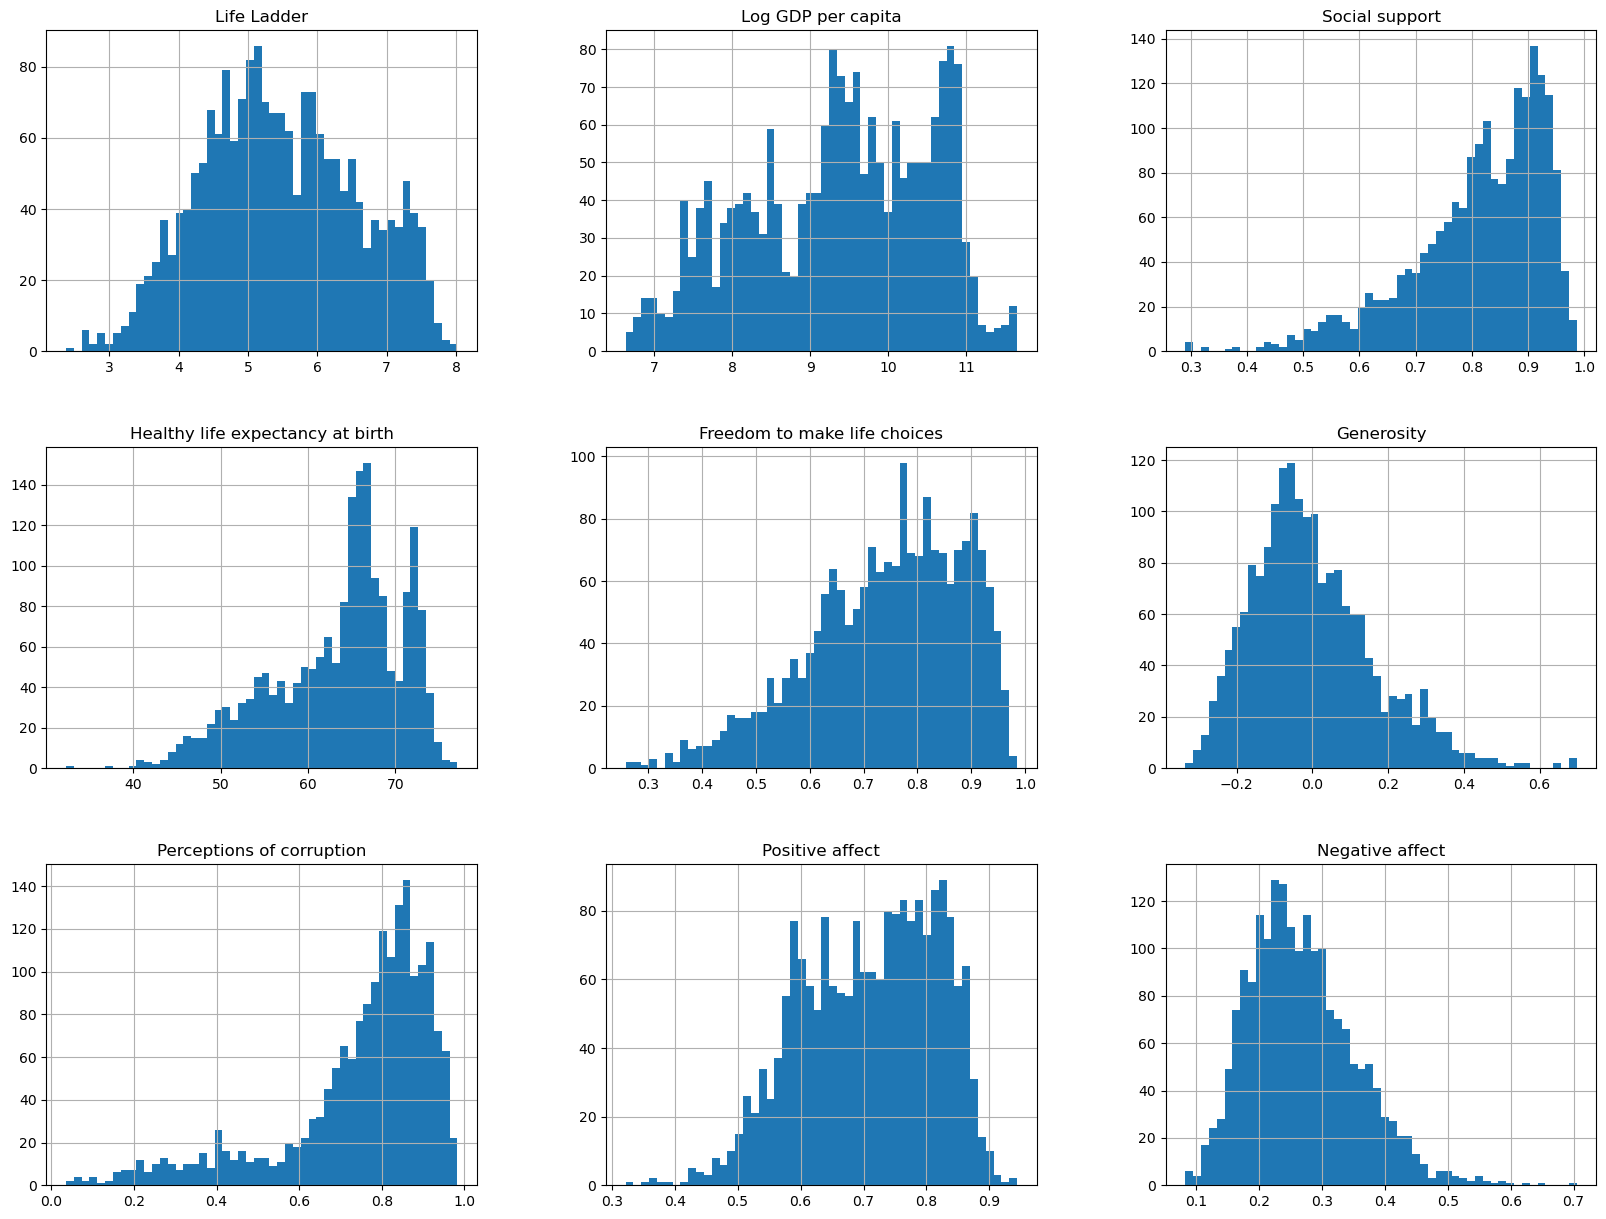

In [668]:
df = df.drop(columns="year")
display(df.describe())
df.hist(bins=50, figsize=(20,15))
plt.show()

### Part C: Data Analysis and PCC chart

Based on the Pearson Correlation Coefficient (PCC) heatmap, the attributes with the highest correlation to the target variable include Low GDP per capita, Life Ladder, Social Support, Freedom to make life choices, and Positive Affect. However, as per the documentation, the Life Ladder attribute must be excluded. Therefore, we select the remaining four attributes for the scatter plot. The analysis involves examining relationships between these attributes and the target variable by computing PCC values and visualizing the data using scatter plots.


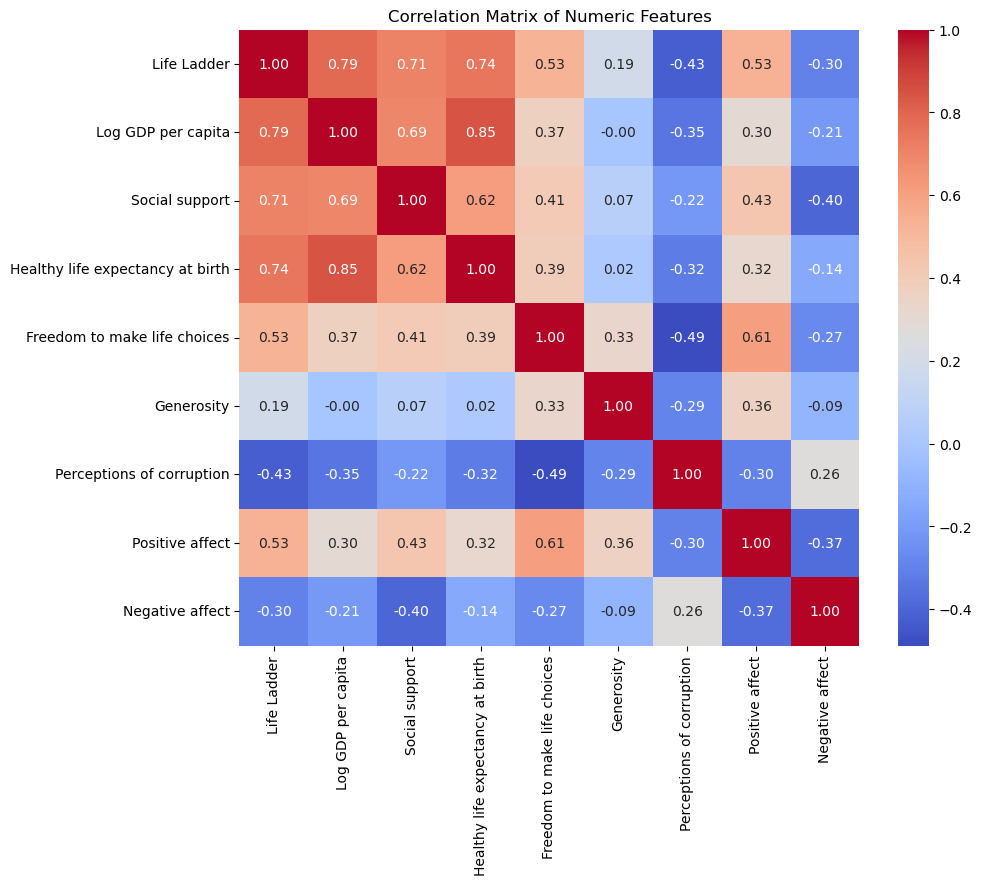

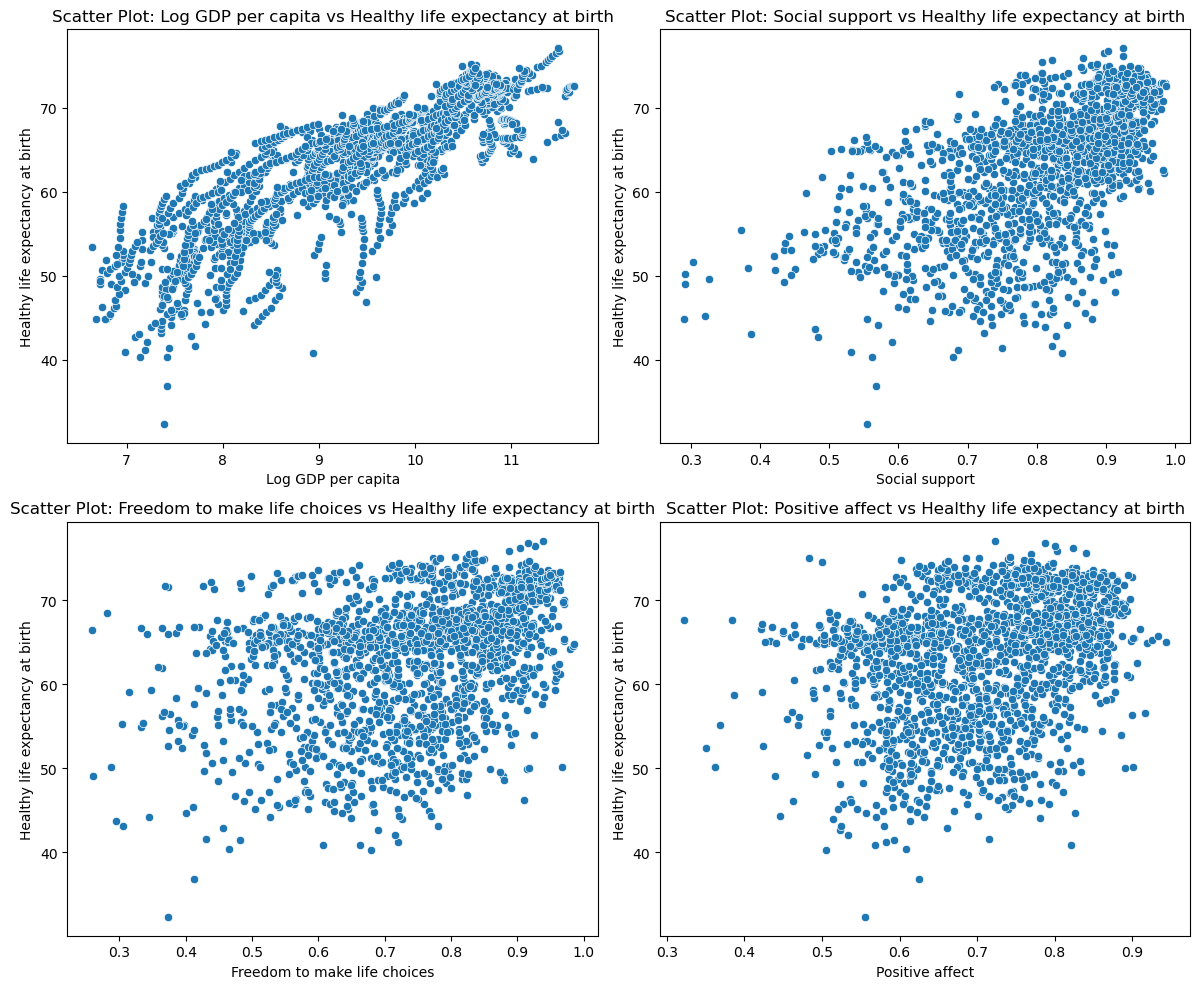

In [669]:
numeric_cols = df.select_dtypes(include=[float,int]).columns
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Generate scatter plots for the attributes that have stronger correlation to the target attribute (Healthy life expectancy at birth)
key_features = ["Log GDP per capita", "Social support", "Freedom to make life choices", "Positive affect"]

plt.figure(figsize=(12, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[feature], y=df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"Scatter Plot: {feature} vs {target}")
    plt.tight_layout()
plt.show()

### Part D: Splitting Data for Training the Model

Before training our linear regression model, we must ensure that all features are in a numerical format. Since **Country name** is a categorical attribute, we first use one-hot encoding to convert it into dummy variables. Next, we handle any missing values by replacing them with the mean of the corresponding columns.

After preprocessing, we split the data into training and test sets (using an 80/20 split). To confirm that the training and test sets are representative of the full dataset, we visualize the distribution of one or more key attributes (for example, "Log GDP per capita") for the entire dataset, as well as for the training and test sets. If the distributions are similar, it suggests that our split is representative.

Since we use 4-fold cross-validation to evaluate our linear regression models (both closed-form and SGD), each fold is further representative of the overall data.
___

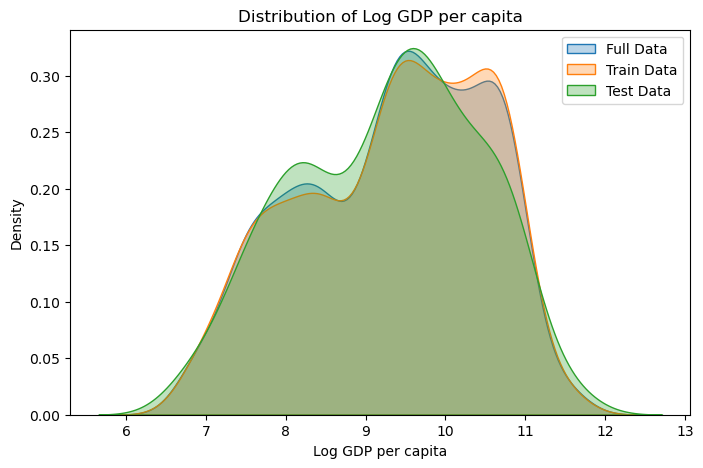

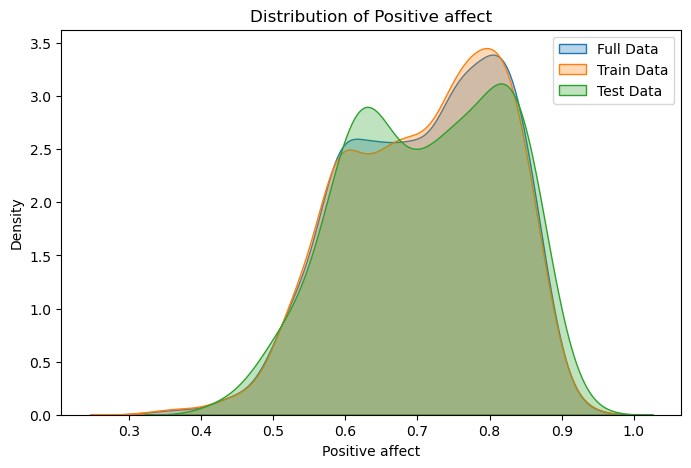

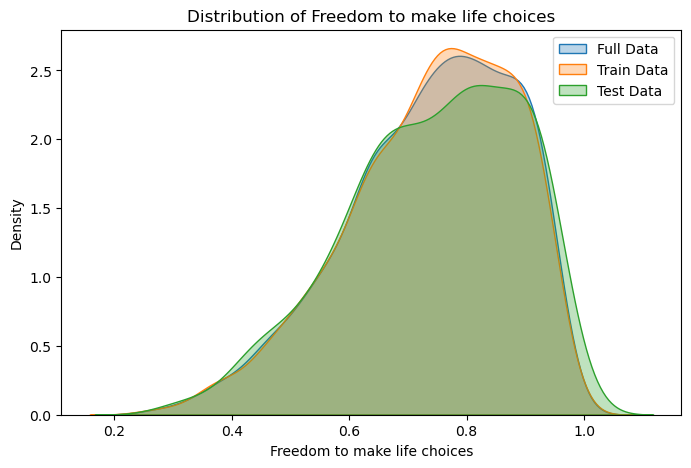

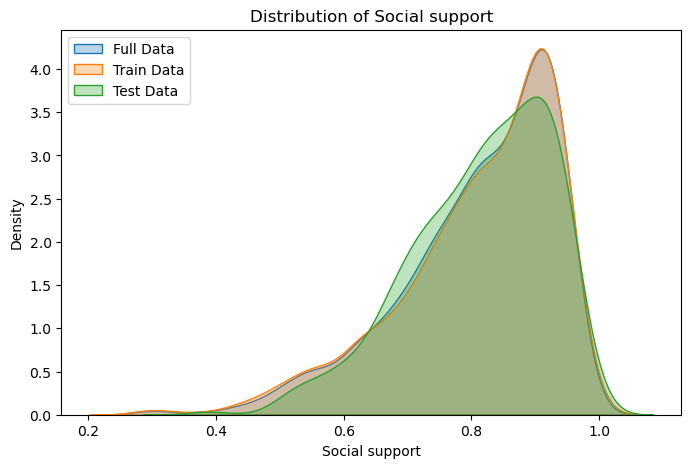

In [670]:
df = pd.get_dummies(df, columns = ['Country name'])

df = df.dropna()
X = df.drop(columns=["Life Ladder"])
y = df["Healthy life expectancy at birth"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features = ['Log GDP per capita', 'Positive affect', 'Freedom to make life choices', "Social support"]  

# Plot the distribution of the train, test and full data set 
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[feature], label="Full Data", fill=True, alpha=0.3)
    sns.kdeplot(X_train[feature], label="Train Data", fill=True, alpha=0.3)
    sns.kdeplot(X_test[feature], label="Test Data", fill=True, alpha=0.3)
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()

### Part E: Training Model in Linear Regression with Cross-Validation and Regularization

#### 1. Discussion of Findings

**Closed-Form vs. SGD:**
- **Closed-Form Solution:**  
  Uses the normal equation (or SVD) to compute an exact solution. This method serves as a baseline for our model’s performance.
- **SGD Approach:**  
  Iteratively updates model parameters based on mini-batches. With appropriate hyperparameters (learning rate, batch size, etc.), the final MSE from SGD should be close to the closed-form MSE.

**Effect of Regularization Penalty:**
- **Low Penalty (e.g., 0.001):**  
  Imposes minimal regularization. The training loss might be very low, but the model may overfit—resulting in higher validation loss.
- **Moderate Penalty (e.g., 0.01):**  
  Often strikes a good balance between reducing overfitting and preserving model flexibility.
- **High Penalty (e.g., 0.1):**  
  Forces the weights to be very small, which can increase bias and lead to higher MSE on both training and validation sets.

**Regularization Types:**
- **Ridge (L2):**  
  Adds a squared penalty term that uniformly shrinks all coefficients.
- **Lasso (L1):**  
  Adds an absolute penalty that encourages sparsity by potentially zeroing out some coefficients.
- **Elastic Net:**  
  Combines both L1 and L2 penalties, balancing between sparsity and uniform shrinkage.

**Hyperparameter Impact (Learning Rate & Batch Size):**
- **Learning Rate:**  
  A higher learning rate can speed up convergence but may overshoot the minimum; a lower learning rate offers more stable updates at the cost of slower convergence.
- **Batch Size:**  
  Smaller batch sizes result in noisier but more frequent updates, which can help escape local minima; larger batch sizes yield more stable gradients but require more computation per update.

**Loss Curves:**
Plotting training and validation loss as a function of training iterations (or epochs) allows us to monitor model convergence. Ideally, both losses should decrease over time and then level off. If the validation loss begins to increase while the training loss continues to drop, it indicates that the model is overfitting.

---



Mean MSE using Closed-Form Solution:  8.661276331810757e-29
Mean MSE using SGD: 5.839903650758376e+19
Mean MSE using Lasso (for alphas 0.001, 0.01, 0.1, 1, 10): [np.float64(1.699525491904067e-08), np.float64(1.6995254918996555e-06), np.float64(0.0001699525491899658), np.float64(0.016995254918997182), np.float64(1.6995254918997023)]
Mean MSE using Ridge (for alphas 0.001, 0.01, 0.1, 1, 10): [np.float64(1.0946871730850034e-12), np.float64(1.0483910200694021e-10), np.float64(7.6710743489523e-09), np.float64(2.118596388130602e-07), np.float64(7.081438572706751e-06)]
Mean MSE using Elastic Net (for alphas 0.001, 0.01, 0.1, 1, 10): [np.float64(1.6994967166815794e-08), np.float64(1.6992377726311452e-06), np.float64(0.00016966515856273737), np.float64(0.01671111432662714), np.float64(1.4445967394711101)]


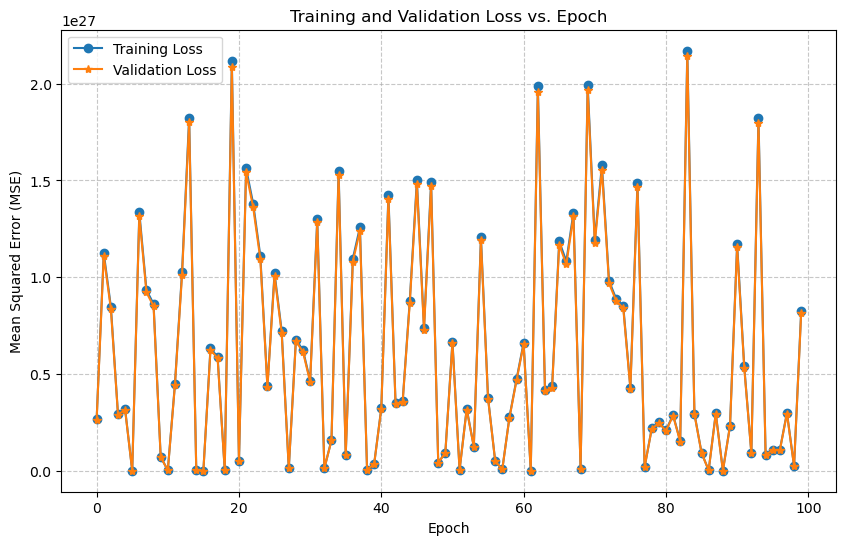

In [ ]:
# Closed form solution(4 fold cross validation)
kf = KFold(n_splits=4)
normal_model = LinearRegression()
normal_mse_scores = []
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    normal_model.fit(X_train_fold, y_train_fold)
    y_val_pred = normal_model.predict(X_val_fold)
    n_mse = mean_squared_error(y_val_fold, y_val_pred)
    normal_mse_scores.append(n_mse)


mse_closed_form_average = np.mean(n_mse)
print("Mean MSE using Closed-Form Solution: ", mse_closed_form_average)

# List of alphas to try
alphas = [0.001, 0.01, 0.1, 1, 10]

# Define a function to perform cross-validation for a given fold and a given model.
def evaluate_model_on_fold(model, X_train_fold, y_train_fold, X_val_fold, y_val_fold):
    model.fit(X_train_fold, y_train_fold)
    predictions = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, predictions)
    return mse

# Initialize dictionaries to store MSE scores for each regularized model
scores = {
    "sgd": [],
    "lasso": {alpha: [] for alpha in alphas},
    "ridge": {alpha: [] for alpha in alphas},
    "elastic": {alpha: [] for alpha in alphas}
}

kf = KFold(n_splits=4, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train):
    X_fold_train = X_train.iloc[train_idx]
    X_fold_val   = X_train.iloc[val_idx]
    y_fold_train = y_train.iloc[train_idx]
    y_fold_val   = y_train.iloc[val_idx]
    
    sgd_model = SGDRegressor(learning_rate='adaptive',
                             max_iter=1000000, tol=1e-3,
                             penalty='l2',
                             eta0=0.001,
                             random_state=42)
    sgd_mse = evaluate_model_on_fold(sgd_model, X_fold_train, y_fold_train.values.ravel(),
                                     X_fold_val, y_fold_val)
    scores["sgd"].append(sgd_mse)
    
    for alpha in alphas:
        # Lasso
        lasso_model = Lasso(alpha=alpha, max_iter=100000)
        mse_lasso = evaluate_model_on_fold(lasso_model, X_fold_train, y_fold_train, X_fold_val, y_fold_val)
        scores["lasso"][alpha].append(mse_lasso)
        
        # Ridge
        ridge_model = Ridge(alpha=alpha, max_iter=100000)
        mse_ridge = evaluate_model_on_fold(ridge_model, X_fold_train, y_fold_train, X_fold_val, y_fold_val)
        scores["ridge"][alpha].append(mse_ridge)
        
        # ElasticNet (with l1_ratio=0.5)
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=100000)
        mse_elastic = evaluate_model_on_fold(elastic_model, X_fold_train, y_fold_train, X_fold_val, y_fold_val)
        scores["elastic"][alpha].append(mse_elastic)

sgd_mean_mse = np.mean(scores["sgd"])

lasso_avg = [np.mean(scores["lasso"][alpha]) for alpha in alphas]
ridge_avg = [np.mean(scores["ridge"][alpha]) for alpha in alphas]
elastic_avg = [np.mean(scores["elastic"][alpha]) for alpha in alphas]

print("Mean MSE using SGD:", sgd_mean_mse)
print("Mean MSE using Lasso (for alphas 0.001, 0.01, 0.1, 1, 10):", lasso_avg)
print("Mean MSE using Ridge (for alphas 0.001, 0.01, 0.1, 1, 10):", ridge_avg)
print("Mean MSE using Elastic Net (for alphas 0.001, 0.01, 0.1, 1, 10):", elastic_avg)


X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np  = X_test.to_numpy()
y_test_np  = y_test.to_numpy()

# Initialize the SGDRegressor with constant learning rate
sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate="constant",
                         penalty='l2', random_state=42)

epochs = 100 
batch_size = 16
n_samples = X_train_np.shape[0]

train_losses = []
val_losses   = []

for epoch in range(epochs):

    indices = np.random.permutation(n_samples)
    
    # Process mini-batches
    for start in range(0, n_samples, batch_size):
        end = start + batch_size
        X_batch = X_train_np[indices[start:end]]
        y_batch = y_train_np[indices[start:end]]
        sgd_model.partial_fit(X_batch, y_batch)
    
    # Compute training and validation predictions and losses
    y_train_pred = sgd_model.predict(X_train_np)
    y_test_pred  = sgd_model.predict(X_test_np)
    train_loss = mean_squared_error(y_train_np, y_train_pred)
    val_loss   = mean_squared_error(y_test_np, y_test_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label="Training Loss", marker='o')
plt.plot(range(epochs), val_losses, label="Validation Loss", marker='*')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss vs. Epoch")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Part F: Polynomial Regression with SGD – Model Training and Loss Analysis

#### 1. Discussion of Findings

**Polynomial Feature Expansion:**  
- Expanding the original features to include polynomial (e.g., degree=2) terms increases model flexibility by allowing the capture of non‑linear relationships.  
- However, this expansion also increases the number of features and the risk of multicollinearity, which can lead to overfitting if not properly controlled.

**SGD Optimization for Polynomial Regression:**  
- We use stochastic gradient descent (SGD) to train the polynomial regression model. With mini-batch updates, SGD offers an iterative approach to minimize the MSE.
- Key hyperparameters include the learning rate, batch size, and number of epochs. These parameters influence the convergence behavior and stability of the training process.

**Monitoring Loss Curves:**  
- By plotting training and validation loss (MSE) against epochs, we can diagnose model performance:
  - If the training loss decreases steadily but the validation loss begins to increase, it is a sign of overfitting.
  - If both training and validation losses remain high and flat, the model may be underfitting.
- The loss curves provide valuable feedback on whether additional tuning (e.g., stronger regularization, altered learning rate, or increased model complexity) is needed.

**Regularization Impact:**  
- Regularization (such as L2 penalty) is crucial when using polynomial features since the model complexity increases. The right level of regularization helps in mitigating overfitting by penalizing large coefficients.

**Hyperparameter Tuning:**  
- Experimenting with different learning rates, regularization strengths (alpha), and batch sizes is important.  
- Fine‑tuning these hyperparameters based on validation loss can help achieve a model that generalizes well.

---

Mean MSE for Polynomial Regression using Lasso (alphas=0.001, 0.01, 0.1, 1, 10):
[np.float64(0.002533806288301451), np.float64(0.00039511548539418776), np.float64(0.04806516555633617), np.float64(0.27337431020356173), np.float64(0.3116700171906124)]

Mean MSE for Polynomial Regression using Ridge (alphas=0.001, 0.01, 0.1, 1, 10):
[np.float64(0.0006713902182612301), np.float64(0.000671445543708255), np.float64(0.0006726504710484646), np.float64(0.000742822480256669), np.float64(0.0032368456769527555)]

Mean MSE for Polynomial Regression using ElasticNet (alphas=0.001, 0.01, 0.1, 1, 10):
[np.float64(4.576962147142505e-05), np.float64(0.00043342043028935927), np.float64(0.0365387998070669), np.float64(0.26164045479696263), np.float64(0.311598583386314)]


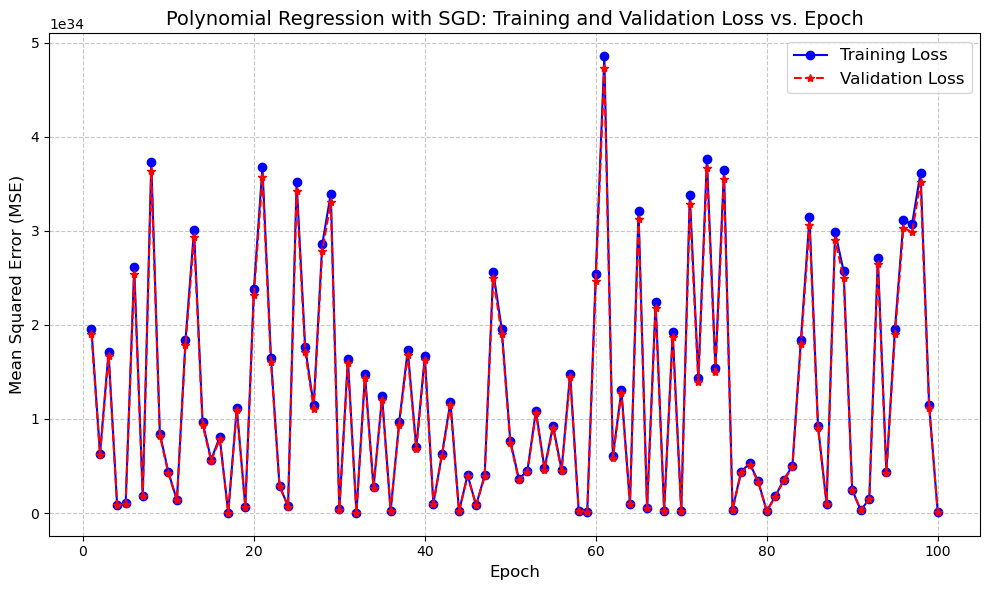

In [675]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# List of regularization parameters (alphas) to test
alphas = [0.001, 0.01, 0.1, 1, 10]


poly_scores = {
    "lasso": {alpha: [] for alpha in alphas},
    "ridge": {alpha: [] for alpha in alphas},
    "elastic": {alpha: [] for alpha in alphas}
}


kf_poly = KFold(n_splits=4, shuffle=True, random_state=42)

# Loop over the folds
for train_idx, val_idx in kf_poly.split(X_train):
    
    X_train_fold = X_train.iloc[train_idx]
    X_val_fold   = X_train.iloc[val_idx]
    y_train_fold = y_train.iloc[train_idx]
    y_val_fold   = y_train.iloc[val_idx]
    
    X_train_poly_fold = poly_features.fit_transform(X_train_fold)
    X_val_poly_fold   = poly_features.transform(X_val_fold)
    
    for alpha in alphas:
       
        lasso_model = Lasso(alpha=alpha, max_iter=100000)
        lasso_model.fit(X_train_poly_fold, y_train_fold)
        lasso_pred = lasso_model.predict(X_val_poly_fold)
        lasso_mse = mean_squared_error(y_val_fold, lasso_pred)
        poly_scores["lasso"][alpha].append(lasso_mse)
      
        ridge_model = Ridge(alpha=alpha, max_iter=100000)
        ridge_model.fit(X_train_poly_fold, y_train_fold)
        ridge_pred = ridge_model.predict(X_val_poly_fold)
        ridge_mse = mean_squared_error(y_val_fold, ridge_pred)
        poly_scores["ridge"][alpha].append(ridge_mse)
        
    
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=100000)
        elastic_model.fit(X_train_poly_fold, y_train_fold)
        elastic_pred = elastic_model.predict(X_val_poly_fold)
        elastic_mse = mean_squared_error(y_val_fold, elastic_pred)
        poly_scores["elastic"][alpha].append(elastic_mse)


lasso_poly_avg   = [np.mean(poly_scores["lasso"][alpha]) for alpha in alphas]
ridge_poly_avg   = [np.mean(poly_scores["ridge"][alpha]) for alpha in alphas]
elastic_poly_avg = [np.mean(poly_scores["elastic"][alpha]) for alpha in alphas]


print("Mean MSE for Polynomial Regression using Lasso (alphas=0.001, 0.01, 0.1, 1, 10):")
print(lasso_poly_avg)
print("\nMean MSE for Polynomial Regression using Ridge (alphas=0.001, 0.01, 0.1, 1, 10):")
print(ridge_poly_avg)
print("\nMean MSE for Polynomial Regression using ElasticNet (alphas=0.001, 0.01, 0.1, 1, 10):")
print(elastic_poly_avg)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly  = poly_features.transform(X_test)

y_train_np = y_train.to_numpy()
y_test_np  = y_test.to_numpy()

sgd_poly = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate="constant",
                         penalty='l2', random_state=42)

epochs = 100       
batch_size = 16    
n_samples = X_train_poly.shape[0]

train_losses_poly = []
val_losses_poly   = []

for epoch in range(epochs):
    indices = np.random.permutation(n_samples)
    
    # Process mini-batches
    for start in range(0, n_samples, batch_size):
        end = start + batch_size
        X_batch = X_train_poly[indices[start:end]]
        y_batch = y_train_np[indices[start:end]]
        sgd_poly.partial_fit(X_batch, y_batch)

    y_train_pred = sgd_poly.predict(X_train_poly)
    y_test_pred  = sgd_poly.predict(X_test_poly)
    train_loss = mean_squared_error(y_train_np, y_train_pred)
    val_loss   = mean_squared_error(y_test_np, y_test_pred)
    
    train_losses_poly.append(train_loss)
    val_losses_poly.append(val_loss)
epochs_range = np.arange(1, epochs+1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_losses_poly, label="Training Loss", marker='o', linestyle='-',
         color='blue')
plt.plot(epochs_range, val_losses_poly, label="Validation Loss", marker='*', linestyle='--',
         color='red')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Polynomial Regression with SGD: Training and Validation Loss vs. Epoch", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Part G: Test Set Predictions and Performance Evaluation

#### 1. Discussion of Findings

**Final Model Evaluation:**  
- After selecting the optimal hyperparameters (via loss monitoring on the validation set) for our polynomial regression model with SGD, we retrain the model on the entire training set.
- The final model is then used to predict the target on the test set.

**Performance Metrics:**  
- We summarize model performance using the **Mean Squared Error (MSE)** and the **R² Score**:
  - A low MSE indicates that, on average, the squared differences between predicted and actual values are small.
  - An R² score close to 1 suggests that a high proportion of the variance in the target variable is explained by the model.
- These metrics allow us to compare the polynomial model’s performance with that of simpler linear models.

**Results Analysis:**  
- If the polynomial model yields a significantly lower test MSE and a higher R² compared to the linear model, it suggests that the non‑linearities in the data are better captured by the polynomial expansion.
- Conversely, if improvements are marginal or if the model overfits (evidenced by a large gap between training and test performance), further adjustments may be needed.

**Further Exploration:**  
- **Hyperparameter Optimization:** Explore a more extensive search over learning rates, regularization parameters, and batch sizes.
- **Model Complexity:** Experiment with higher‑degree polynomials or additional interaction terms.
- **Alternative Methods:** Consider advanced models (such as Random Forests, Gradient Boosting, or neural networks) if the relationship between features and the target is highly non‑linear.
- **Feature Engineering & Scaling:** Further refine feature transformations, including alternative scaling or normalization techniques, to boost model performance.

---


Mean 4-fold CV MSE (Closed-Form LinearRegression): 1.244402128914247e-09
Test Mean Squared Error (MSE): 7.732497630966381e-28
Test R² Score: 1.0


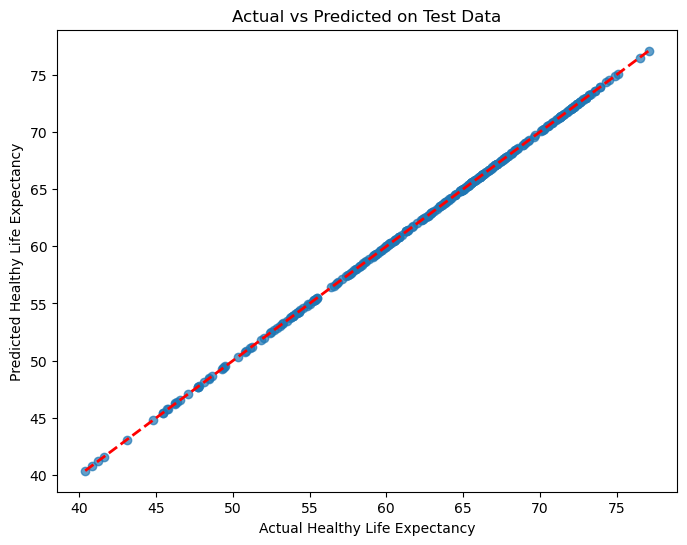

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = KFold(n_splits=4, shuffle=True, random_state=42)
model = LinearRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print("Mean 4-fold CV MSE (Closed-Form LinearRegression):", mean_cv_mse)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error (MSE):", test_mse)
print("Test R² Score:", test_r2)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Healthy Life Expectancy")
plt.ylabel("Predicted Healthy Life Expectancy")
plt.title("Actual vs Predicted on Test Data")
plt.show()
